<a href="https://colab.research.google.com/github/RafaelPerez16/rpz_data_science/blob/main/RJ_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [Rafael Perez](https://www.linkedin.com/in/rafael-perez-64965124/)*

---

# Análise dos Dados do Airbnb - *Rio de Janeiro*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. o maior detalhe é que **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

# Rio de Janeiro,
É um município brasileiro, capital do estado homônimo, situado no Sudeste do país. Maior destino turístico internacional no Brasil, da América Latina e de todo o Hemisfério Sul, a capital fluminense é a cidade brasileira mais conhecida no exterior, funcionando como um "espelho", ou "retrato" nacional, seja positiva ou negativamente. É a segunda maior metrópole do Brasil (depois de São Paulo), a sexta maior da América.

Sua população estimada pelo **IBGE** para 1.º de julho de 2020 era de **6 747 815 habitantes.** Mais conhecida como **Cidade Maravilhosa** e aquele que nela nasce é chamado de carioca
<center><img alt="Rio de Janeiro" width= "100%" src=https://www.melhoresdestinos.com.br/wp-content/uploads/2019/08/rio-de-janeiro-capa2019-01.jpg?h=500&W=100></center>





## Obtenção de dados

Todos os dados usados nesse projeto foram obtidos a partir do site [inside Airbnb](http://insideairbnb.com/get-the-data.html).
Para essa análise exploratória inicial, será consultado apenas o seguinte arquivo:
* `listings.csv`*Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
# importar o arquivo listings.csv para um DataFrame
df= pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-02-22/visualisations/listings.csv")


## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,221,5,260,2021-02-08,2.01,1,304
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,2018-02-14,0.67,1,10
2,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.82,11,328
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,273,2,181,2020-03-15,2.02,1,207
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,135,3,353,2021-02-10,2.79,1,101


### Prosseguindo vamos identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [4]:
print('entradas (linhas):\t{}'.format(df.shape[0]))
print('variaveis (colunas):\t{}'.format(df.shape[1]))
display(df.dtypes)


entradas (linhas):	26615
variaveis (colunas):	16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Identificando a porcentagem de valores ausentes no *dataset***

In [12]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.374150
last_review                       0.374150
name                              0.001090
host_name                         0.000902
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### Analisando de forma gráfica

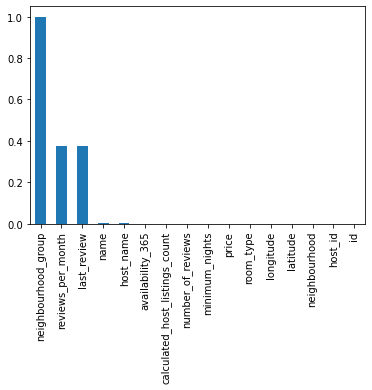

In [14]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending= False).plot(kind='bar')

### Para identificar a distribuição das variáveis, irei plotar o histograma:


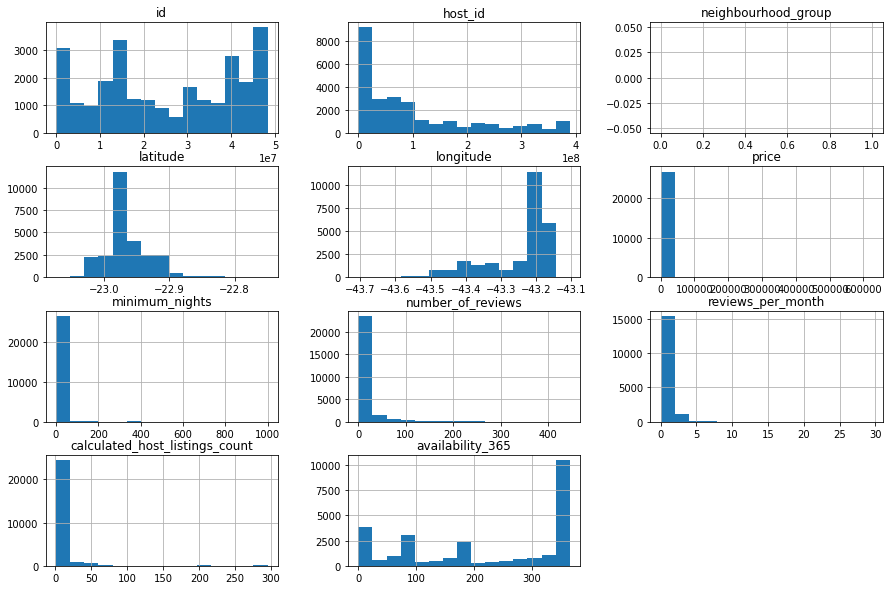

In [18]:
df.hist(bins=15, figsize=(15,10));


 Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis minimum_nights e calculated_host_listings_count.

### Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers.

**1ª Resumo estatístico por meio do método** ***describe()***

In [19]:
df[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,26615.000000,26615.000000,26615.000000,16657.000000,26615.000000,26615.000000
mean,742.589254,4.725268,12.146308,0.629190,9.665414,219.438174
std,5368.868834,19.102522,29.722813,0.876064,35.942124,141.525405
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,157.000000,1.000000,0.000000,0.090000,1.000000,88.000000
50%,280.000000,2.000000,2.000000,0.270000,1.000000,254.000000
75%,550.000000,4.000000,9.000000,0.850000,3.000000,363.000000
max,625216.000000,1000.000000,446.000000,29.530000,295.000000,365.000000


Analisando os dados:

A variável *Price* porrui 75% dos seus valores abaixo de 550, porém exite um valor máximo de 625.216.

A quantidade mínima de noites está acima de 365, apresenta o valor máximo de 1000



**2º Plotar o Boxplot para as variáveis**

Boxplot ***Price***



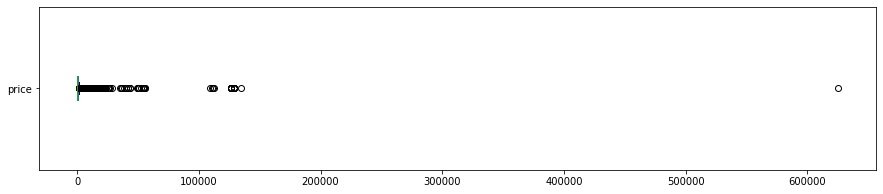

In [27]:
# Price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [30]:
# verificar valores acima de 1.500
print("{}entradas".format(len(df[df.price>1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))


1811entradas
6.8044%


 Chegamos a conclusão que temos 1.811 entradas com *price* acima de 1.500 que representa apenas 6.8% de todos os dados.

Boxplot ***minimum_nights***


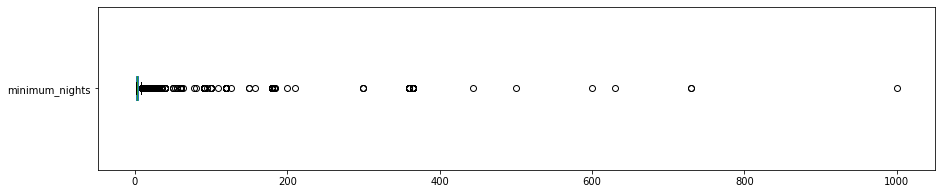

minimum_nights: valores acima de 30:
204entradas
0.7665%


In [39]:
# Minimum Nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()
# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{}entradas".format(len(df[df.minimum_nights>30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))


Verificado que dentro do conjunto de dados temos 204 entradas com minimum_nights acima de 30 representando 0.76%

### Ao identificar os outliers nas variáveis ***price*** e ***minimum_night*** vamos limpar o Dataframe e plotar novamente o histograma:

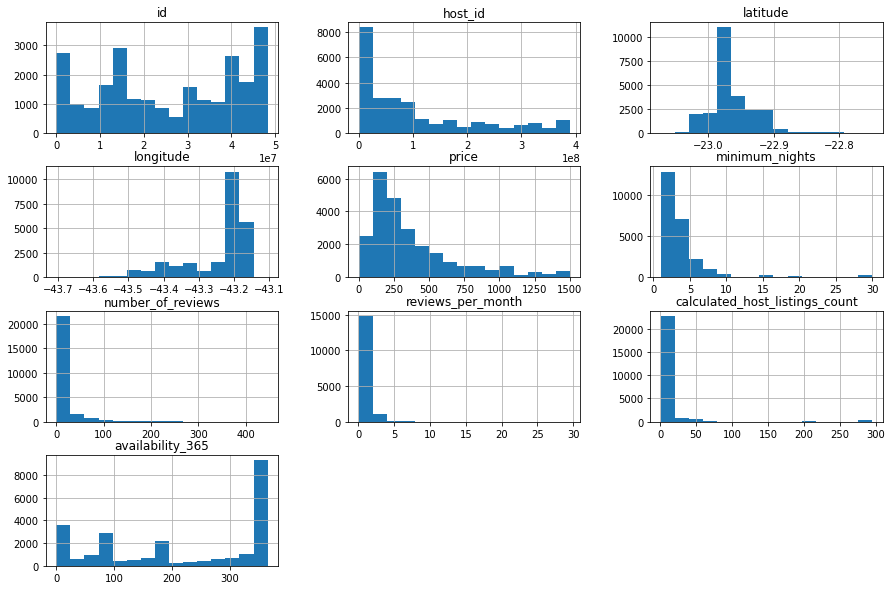

In [46]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o  novo histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));



### **Qual a média dos preços de aluguel?**

In [50]:
# ver a média da coluna price inicial
print("Média de preços inicial:")
sum(df.price)/len(df.price)


Média de preços inicial:


742.5892541799738

In [51]:
# ver a média da coluna price pós limpeza dos dados
print("Média de preços:")
sum(df_clean.price)/len(df_clean.price)

Média de preços:


368.23126599244546

Verificamos que com a exclusão dos outliers a média dos preços teve uma redução de 50% 

### **Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas variaveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse.

In [52]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
    
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.128833,-0.154570,-0.156886,0.055118,0.080324
minimum_nights,0.128833,1.000000,-0.066031,-0.108980,-0.070371,-0.016255
number_of_reviews,-0.154570,-0.066031,1.000000,0.581592,-0.059649,-0.069988
reviews_per_month,-0.156886,-0.108980,0.581592,1.000000,-0.004081,-0.128388
calculated_host_listings_count,0.055118,-0.070371,-0.059649,-0.004081,1.000000,0.053034
availability_365,0.080324,-0.016255,-0.069988,-0.128388,0.053034,1.000000


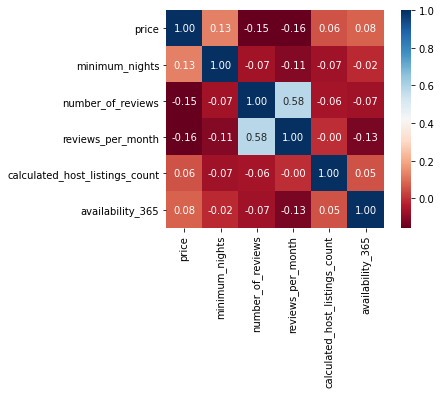

In [53]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white',annot=True);

### Qual o tipo de imóvel mais alugado no Airbnb:

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [54]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    17493
Private room        6435
Shared room          595
Hotel room            98
Name: room_type, dtype: int64

In [55]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/ df_clean.shape[0]


Entire home/apt    0.710491
Private room       0.261362
Shared room        0.024166
Hotel room         0.003980
Name: room_type, dtype: float64

### ** Qual a localidade mais cara do dataset**

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.


In [60]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vista Alegre        1326.000000
Cavalcanti           925.000000
Vaz Lobo             832.000000
Anchieta             800.000000
Cacuia               795.000000
Freguesia (Ilha)     754.000000
Osvaldo Cruz         733.333333
Realengo             624.000000
Inhoaíba             547.000000
Grumari              532.666667
Name: price, dtype: float64

Acima, vemos que bairros como Vista Alegre, Cavalcanti e Vaz Lobo, estão com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Vista Alegre.

In [63]:
# ver quantidade de imóveis em Vista Alegre
print(df_clean[df_clean.neighbourhood == "Vista Alegre"].shape)

(1, 15)


In [66]:
# ver a unica entrada de Vista Alegre
df_clean[df_clean.neighbourhood == "Vista Alegre"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7943,13654995,Cozy colonial style room,79273288,Sérgio,Vista Alegre,-22.8286,-43.31916,Private room,1326,1,1,2016-08-05,0.02,1,365


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

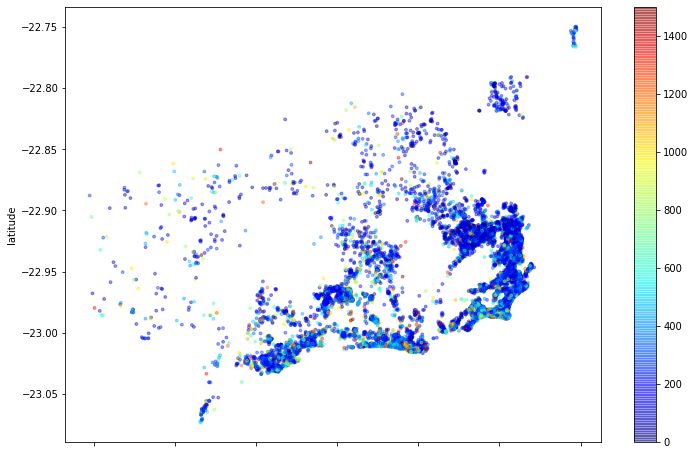

In [67]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Qual é a média do mínimo de noites para aluguel**

In [68]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.sum()/ df_clean.shape[0]

3.4481133991308233

## Conclusões


Conclusões
Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

De acordo com a análise, foi identificado que mais de 71% dos tipos das acomodações são a casa ou apartamento inteiro, com uma média de 3,45 noites por hóspede.

Mas que podemos verificar pela plotagem dos mapas as principais regiões onde possui alta demanda e consequentemente se concentram as ofertas dos imoveis.
